In [2]:
import pandas as pd

def load_digits(filename):
    testData = pd.read_csv(filename)
    Y = testData.iloc[:,0]
    X = testData.iloc[:,1:]
    return X, Y

In [3]:
# Get X & Y
train_x, train_y = load_digits("train.csv")

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def plot_digit(feature_vector):
    a = np.reshape(feature_vector, (28,28))
    plt.imshow(a)
    plt.show()

/usr/local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


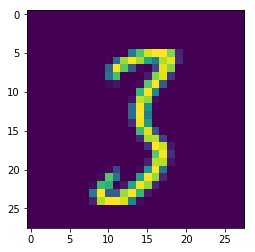

In [5]:
import random 

index = random.randint(0,len(train_y))
plot_digit(train_x.iloc[index,:])

In [6]:
test_x  = pd.read_csv("test.csv")


In [7]:
from sklearn.svm import LinearSVC

clf = LinearSVC()
clf.fit(train_x,train_y)
hyp = clf.predict(test_x)

Classified as 5


/usr/local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


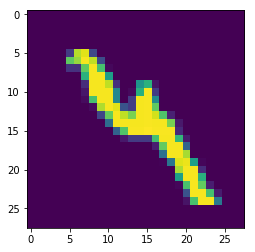

Classified as 0


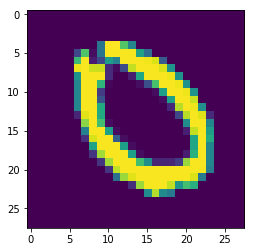

Classified as 6


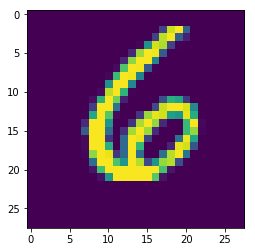

Classified as 8


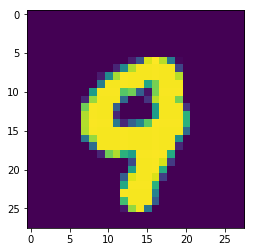

Classified as 7


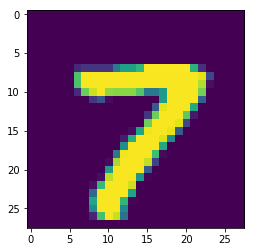

Classified as 5


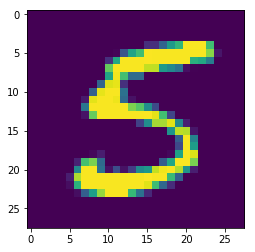

Classified as 8


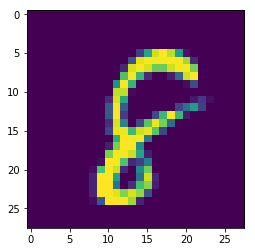

Classified as 8


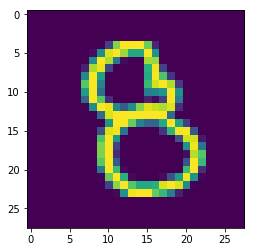

Classified as 0


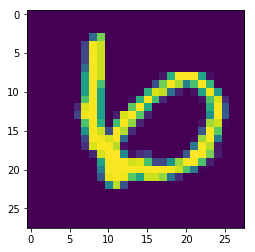

Classified as 2


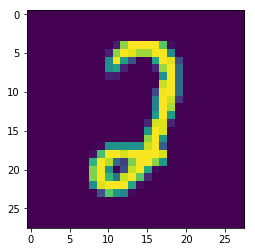

In [13]:
for i in range(10):
    index = random.randint(0, len(test_x))
    print('Classified as', hyp[index])
    plot_digit(test_x.iloc[index,:])

In [20]:
from sklearn.metrics import accuracy_score

X = train_x.iloc[:-100,:]
Y = train_y.iloc[:-100]
test_x = train_x.iloc[-100:,:]
test_y = train_y.iloc[-100:]

# clf = LinearSVC(random_state = 100)
clf.fit(X, Y)
hyp = clf.predict(test_x)
print('Accuracy:', accuracy_score(test_y, hyp))

Accuracy: 0.91


In [21]:
from sklearn.model_selection import KFold

x_for_kfold = ['a','b','c','d','e','f','g','h','i','j']
kfold = KFold(n_splits=5)
for train_indices, test_indices in kfold.split(x_for_kfold):
    print('Train: {} | Test: {}'.format(train_indices,test_indices))

Train: [2 3 4 5 6 7 8 9] | Test: [0 1]
Train: [0 1 4 5 6 7 8 9] | Test: [2 3]
Train: [0 1 2 3 6 7 8 9] | Test: [4 5]
Train: [0 1 2 3 4 5 8 9] | Test: [6 7]
Train: [0 1 2 3 4 5 6 7] | Test: [8 9]


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

parameters = {'kernel':('linear','rbf'),'C':[0.001,0.01,0.1,1,10,100,1000]}
svc = SVC(random_state = 100)
clf = GridSearchCV(svc,parameters,cv=5)
clf.fit(X,Y)
print('Best score', clf.best_score_)
print(clf.best_estimator_)